# ***Installation des Bibliothèques***

In [4]:
!pip install SPARQLWrapper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00


In [5]:
!pip install mlxtend

In [6]:
!pip install pandas

In [1]:
!pip install matplotlip

# **Partie 1**: Extraction de Données

In [7]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("http://dbpedia.org/sparql")
sparql.setQuery("""
   PREFIX dbo: <http://dbpedia.org/ontology/>
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>

    SELECT ?artist ?birthPlace ?birthDate ?artwork ?genre
    WHERE {
        ?artist a dbo:Artist .
        ?artist dbo:birthPlace ?birthPlace .
        OPTIONAL { ?artist dbo:birthDate ?birthDate }
        OPTIONAL { ?artist dbo:author ?artwork }
        OPTIONAL { ?artist dbo:genre ?genre }
    }
    LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

#Affichage des resultats
for result in results["results"]["bindings"]:
    artist = result["artist"]["value"]
    birth_place = result["birthPlace"]["value"]
    birth_date = result.get("birthDate", {}).get("value", "N/A")
    artwork = result.get("artwork", {}).get("value", "N/A")
    genre = result.get("genre", {}).get("value", "N/A")

    print(f"Artist: {artist}, Birth Place: {birth_place}, Birth Date: {birth_date}, Artwork: {artwork}, Genre: {genre}")

Artist: http://dbpedia.org/resource/Cab_Calloway, Birth Place: http://dbpedia.org/resource/Rochester,_New_York, Birth Date: 1907-12-25, Artwork: N/A, Genre: http://dbpedia.org/resource/Blues
Artist: http://dbpedia.org/resource/Cab_Calloway, Birth Place: http://dbpedia.org/resource/Rochester,_New_York, Birth Date: 1907-12-25, Artwork: N/A, Genre: http://dbpedia.org/resource/Swing_music
Artist: http://dbpedia.org/resource/Cab_Calloway, Birth Place: http://dbpedia.org/resource/Rochester,_New_York, Birth Date: 1907-12-25, Artwork: N/A, Genre: http://dbpedia.org/resource/Jazz
Artist: http://dbpedia.org/resource/Cabum, Birth Place: http://dbpedia.org/resource/Ghana, Birth Date: 1985-06-15, Artwork: N/A, Genre: http://dbpedia.org/resource/Hip_hop_music
Artist: http://dbpedia.org/resource/Cabum, Birth Place: http://dbpedia.org/resource/Ghana, Birth Date: 1985-06-15, Artwork: N/A, Genre: http://dbpedia.org/resource/Rap
Artist: http://dbpedia.org/resource/Cachao, Birth Place: http://dbpedia.org/

In [8]:
# Traitement des résultats
transactions = []
for result in results["results"]["bindings"]:
    artist = result["artist"]["value"]
    birth_place = result["birthPlace"]["value"]
    birth_date = result.get("birthDate", {}).get("value", "N/A")
    artwork = result.get("artwork", {}).get("value", "N/A")
    genre = result.get("genre", {}).get("value", "N/A")
    transactions.append([artist, birth_place, birth_date, artwork, genre])

# **Partie 2**: Prétraitement des Données

In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Prétraitement des transactions pour l'algorithme Apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,1907-12-25,1918-09-14,1985-06-15,N/A,http://dbpedia.org/resource/Blues,http://dbpedia.org/resource/Cab_Calloway,http://dbpedia.org/resource/Cabum,http://dbpedia.org/resource/Cachao,http://dbpedia.org/resource/Danzón,http://dbpedia.org/resource/Descarga,http://dbpedia.org/resource/Ghana,http://dbpedia.org/resource/Hip_hop_music,http://dbpedia.org/resource/Jazz,http://dbpedia.org/resource/La_Habana,http://dbpedia.org/resource/Mambo_(music),http://dbpedia.org/resource/Old_Havana,http://dbpedia.org/resource/Rap,"http://dbpedia.org/resource/Rochester,_New_York",http://dbpedia.org/resource/Swing_music
0,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True
2,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
3,False,False,True,True,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False
4,False,False,True,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False
5,False,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False
6,False,True,False,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False
7,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False
8,False,True,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False
9,False,True,False,True,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False


# **Partie 3**: Extraction de Règles d'Association

In [10]:
min_support = 0.1  # 10%
min_confidence = 0.7 #70%

# Utilisation des seuils dans l'algorithme Apriori
frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

for index, row in rules.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']

    # Construction de la requête SPARQL
    sparql_query = f"""
    PREFIX dbo: <http://dbpedia.org/ontology/>
    SELECT DISTINCT * WHERE {{
        ?subject {' ; '.join([f'dbo:{predicate}' for predicate in antecedent])} .
        {{
            SELECT DISTINCT * WHERE {{
                ?subject {' ; '.join([f'dbo:{predicate}' for predicate in consequent])} .
            }}
        }}
    }}
    LIMIT 10
    """

    # Affichage de la requête générée
    print(f"Requête SPARQL pour la Règle {index + 1}:\n{sparql_query}\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
    

Requête SPARQL pour la Règle 281:

    PREFIX dbo: <http://dbpedia.org/ontology/>
    SELECT DISTINCT * WHERE {
        ?subject dbo:N/A ; dbo:http://dbpedia.org/resource/Jazz .
        {
            SELECT DISTINCT * WHERE {
                ?subject dbo:http://dbpedia.org/resource/Cab_Calloway ; dbo:1907-12-25 .
            }
        }
    }
    LIMIT 10
    

Requête SPARQL pour la Règle 282:

    PREFIX dbo: <http://dbpedia.org/ontology/>
    SELECT DISTINCT * WHERE {
        ?subject dbo:http://dbpedia.org/resource/Jazz .
        {
            SELECT DISTINCT * WHERE {
                ?subject dbo:http://dbpedia.org/resource/Cab_Calloway ; dbo:1907-12-25 ; dbo:N/A .
            }
        }
    }
    LIMIT 10
    

Requête SPARQL pour la Règle 283:

    PREFIX dbo: <http://dbpedia.org/ontology/>
    SELECT DISTINCT * WHERE {
        ?subject dbo:http://dbpedia.org/resource/Rochester,_New_York ; dbo:1

# **Partie 4**: Écriture des Données dans un Fichier CSV

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
from datetime import datetime

# Nous allons ecrire les resultats dans le fichier csv
drive_csv_path = "/content/drive/MyDrive/Colab Notebooks/dbpedia_transactions.csv"

current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Écriture des données dans le fichier CSV
with open(drive_csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)

    # Entete
    header = ["Artist", "Birth Place", "Birth Date", "Artwork", "Genre", "Query Date"]
    writer.writerow(header)

    # Écriture des données
    for transaction in transactions:
        transaction.append(current_datetime)
        writer.writerow(transaction)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Partie 5**: Validation des Règles

In [ ]:
# Tri des règles par fréquence décroissante
sorted_rules = rules.sort_values(by='support', ascending=False)

# Sélection des 10 premières règles
top_10_rules = sorted_rules.head(10)

# Affichage des règles et de leurs métriques
for idx, row in top_10_rules.iterrows():
    antecedent = row['antecedents']
    consequent = row['consequents']
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']

    # Commentaire qualitatif
    qualitative_comment = f"La règle associe {antecedent} à {consequent}."

    # Commentaire quantitatif
    quantitative_comment = f"Avec une confiance de {confidence:.2f} et un lift de {lift:.2f}, indiquant une forte corrélation."

    # Affichage des résultats
    print(f"Règle {idx + 1} : {qualitative_comment} {quantitative_comment}\n")


Règle 27 : La règle associe frozenset({'http://dbpedia.org/resource/Cachao'}) à frozenset({'N/A'}). Avec une confiance de 1.00 et un lift de 1.00, indiquant une forte corrélation.

Règle 9 : La règle associe frozenset({'1918-09-14'}) à frozenset({'N/A'}). Avec une confiance de 1.00 et un lift de 1.00, indiquant une forte corrélation.

Règle 102 : La règle associe frozenset({'http://dbpedia.org/resource/Cachao', 'N/A'}) à frozenset({'1918-09-14'}). Avec une confiance de 1.00 et un lift de 2.00, indiquant une forte corrélation.

Règle 103 : La règle associe frozenset({'1918-09-14', 'N/A'}) à frozenset({'http://dbpedia.org/resource/Cachao'}). Avec une confiance de 1.00 et un lift de 2.00, indiquant une forte corrélation.

Règle 104 : La règle associe frozenset({'http://dbpedia.org/resource/Cachao', '1918-09-14'}) à frozenset({'N/A'}). Avec une confiance de 1.00 et un lift de 1.00, indiquant une forte corrélation.

Règle 106 : La règle associe frozenset({'1918-09-14'}) à frozenset({'http:/

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Annexe**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


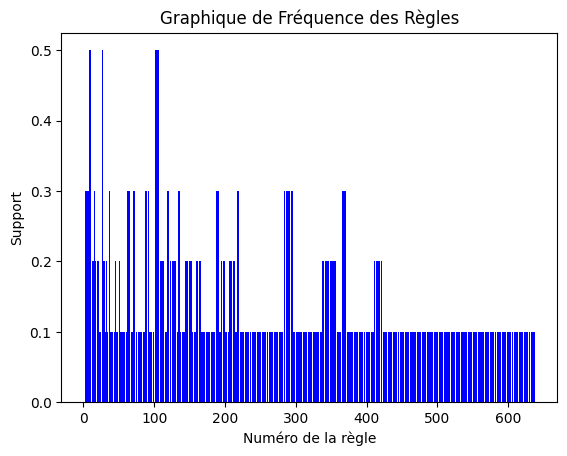

In [14]:
import matplotlib.pyplot as plt

supports = rules['support'].tolist()
rule_numbers = range(1, len(supports) + 1)
plt.bar(rule_numbers, supports, color='blue')
plt.xlabel('Numéro de la règle')
plt.ylabel('Support')
plt.title('Graphique de Fréquence des Règles')

# Affichage du graphique
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


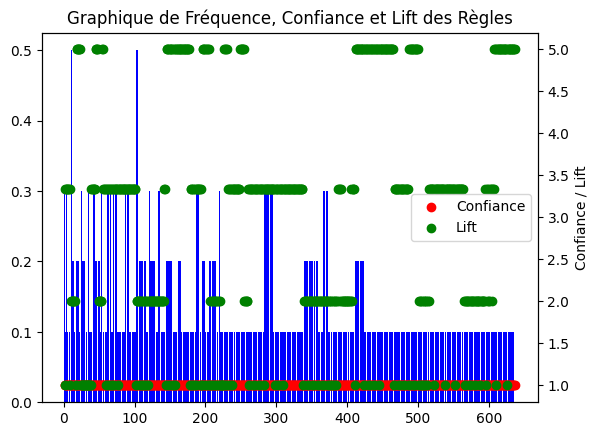